In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage
import os

%matplotlib inline

In [2]:
rotate = lambda img, rot, cval: ndimage.interpolation.rotate(img, rot, cval=cval, reshape=False)

def make_imgs(img, filename, original_dir):
    filename = filename[:filename.rindex('.')]
    rots = range(0, 360, 10)
    cval= img[5, 5]
    if img.shape != (100, 100):
        print("\t\t", img.shape)
    for x in rots:
        imgrot = rotate(img, x, cval)
        path = os.path.join(original_dir, 'out', '{}-{}.png'.format(filename, x))
        plt.imsave(path, imgrot, cmap='gray', vmax=256)

50c_1fr_2fr
	 0-1-back.png
	 36swiss41.jpg
	 36swiss21.jpg
	 2ffh.jpg
	 38swiss21.jpg
	 0-1-back2.png
	 36swiss71.jpg
	 2fb.jpg
	 50cb.jpg
	 38swiss31.jpg
	 1fb.jpg
	 36swiss31.jpg
5c_10c_20c
	 0-1-back.png
	 5k2.jpg
	 5cb.jpg
	 35switz12.jpg
	 0-1-back2.png
	 10cb.jpg
	 20cfh.jpg
	 5bkk.jpg
	 20cb.jpg
	 10bk.jpg
1fr
	 1ff.jpg
	 36swiss3.jpg
	 1.jpg
	 38swiss3.jpg
	 1frh.jpg
	 0-1-front.png
20c
	 coin20.jpg
	 20.jpg
	 15switz8.jpg
	 20cf.jpg
	 20crh.jpg
	 35switz1.jpg
	 0-1-front.png
10c
	 coin10.jpg
	 10crh.jpg
	 36swiss5.jpg
	 10cf.jpg
	 0-1-front.png
	 10.jpg
2fr
	 38swiss2.jpg
	 2ff.jpg
	 2frh.jpg
	 0-1-front.png
	 2.jpg
	 36swiss2.jpg
5c
	 5crh.jpg
	 5cf.jpg
	 5.jpg
	 35switz2.jpg
	 36swiss8.jpg
	 0-1-front.png
5fr
	 0-1-back.png
	 5fr.jpg
	 38swiss1.jpg
	 5ffh.jpg
	 36swiss1.jpg
	 5fb.jpg
	 5.jpg
	 5ff.jpg
	 38swiss11.jpg
	 5frh.jpg
	 0-1-front.png
	 36swiss11.jpg
	 5front.jpg
50c
	 36swiss7.jpg
	 50crh.jpg
	 50cf.jpg
	 36swiss4.jpg
	 0-1-front.png
	 50.jpg


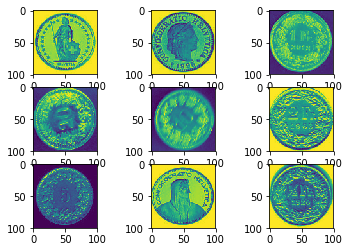

In [3]:
_, subdirs, _ = next(os.walk('.'))
i = 1
fig = plt.figure()
for subd in subdirs:
    if subd[0] != '.':
        print(subd)
        _, _, files = next(os.walk(subd))
        fig.add_subplot(3, 3, i)
        i += 1
        first = True
        for f in files:
            print("\t", f)
            os.makedirs(os.path.join(subd, 'out'), exist_ok=True)
            fullpath = os.path.join(subd, f)
            img = np.copy(np.asarray(Image.open(fullpath, 'r')))
            
            if img.ndim == 3:
                img = np.mean(img, 2)
        
            if first:
                first = False
                plt.imshow(img)
            make_imgs(img, f, subd)